In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import load_model


In [ ]:
# Veri artırma
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/rice-leaf-disease-image")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-leaf-disease-image


In [ ]:
train_generator = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 4747 images belonging to 4 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1185 images belonging to 4 classes.


In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Özelleştirilmiş sınıflandırma bloğu
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Modeli oluştur
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=3)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.7618 - loss: 2.5755

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 72s 453ms/step - accuracy: 0.7624 - loss: 2.5651 - val_accuracy: 0.9629 - val_loss: 0.1278
Epoch 2/3
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 427ms/step - accuracy: 0.9163 - loss: 0.2336 - val_accuracy: 0.9713 - val_loss: 0.0827
Epoch 3/3
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 430ms/step - accuracy: 0.9493 - loss: 0.1609 - val_accuracy: 0.9890 - val_loss: 0.0357
              precision    recall  f1-score   support

           0     0.9873    0.9810    0.9841       316
           1     0.9723    0.9757    0.9740       288
           2     0.9875    0.9906    0.9891       320
           3     1.0000    1.0000    1.0000       261

    accuracy                         0.9865      1185
   macro avg     0.9868    0.9868    0.9868      1185
weighted avg     0.9865    0.9865    0.9865      1185



In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=6)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.7454 - loss: 3.0530

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 113s 707ms/step - accuracy: 0.7460 - loss: 3.0405 - val_accuracy: 0.9586 - val_loss: 0.1137
Epoch 2/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.9479 - loss: 0.1506 - val_accuracy: 0.9907 - val_loss: 0.0426
Epoch 3/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 428ms/step - accuracy: 0.9611 - loss: 0.1041 - val_accuracy: 0.9781 - val_loss: 0.0653
Epoch 4/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 430ms/step - accuracy: 0.9552 - loss: 0.1120 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 5/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 429ms/step - accuracy: 0.9667 - loss: 0.0990 - val_accuracy: 0.9907 - val_loss: 0.0252
Epoch 6/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 63s 425ms/step - accuracy: 0.9642 - loss: 0.0941 - val_accuracy: 0.9814 - val_loss: 0.0473
              precision    recall  f1-score   support

           0     0.9966    0.9399    0.9674       316
           1     0.9502    0.9931    0.9711       288
           2     0.9846    0.9969    0.9907       320
           3

In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=9)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7298 - loss: 4.3589

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 73s 460ms/step - accuracy: 0.7306 - loss: 4.3401 - val_accuracy: 0.9578 - val_loss: 0.1268
Epoch 2/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 433ms/step - accuracy: 0.9272 - loss: 0.2089 - val_accuracy: 0.9772 - val_loss: 0.0733
Epoch 3/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 435ms/step - accuracy: 0.9517 - loss: 0.1337 - val_accuracy: 0.9781 - val_loss: 0.0650
Epoch 4/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 430ms/step - accuracy: 0.9625 - loss: 0.0975 - val_accuracy: 0.9932 - val_loss: 0.0237
Epoch 5/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 429ms/step - accuracy: 0.9717 - loss: 0.0682 - val_accuracy: 0.9882 - val_loss: 0.0397
Epoch 6/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 429ms/step - accuracy: 0.9671 - loss: 0.0905 - val_accuracy: 0.9907 - val_loss: 0.0317
Epoch 7/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 430ms/step - accuracy: 0.9719 - loss: 0.0846 - val_accuracy: 0.9831 - val_loss: 0.0392
Epoch 8/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 430ms/step - accuracy: 0.9679 - loss: 0.0960 - val_accura

In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=12)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.7263 - loss: 3.4573

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 74s 466ms/step - accuracy: 0.7269 - loss: 3.4423 - val_accuracy: 0.9165 - val_loss: 0.2427
Epoch 2/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 446ms/step - accuracy: 0.8993 - loss: 0.2613 - val_accuracy: 0.9738 - val_loss: 0.0753
Epoch 3/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 447ms/step - accuracy: 0.9367 - loss: 0.1636 - val_accuracy: 0.9747 - val_loss: 0.0747
Epoch 4/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 447ms/step - accuracy: 0.9454 - loss: 0.1377 - val_accuracy: 0.9789 - val_loss: 0.0707
Epoch 5/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 442ms/step - accuracy: 0.9565 - loss: 0.1222 - val_accuracy: 0.9865 - val_loss: 0.0360
Epoch 6/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.9536 - loss: 0.1149 - val_accuracy: 0.9932 - val_loss: 0.0203
Epoch 7/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 437ms/step - accuracy: 0.9571 - loss: 0.1003 - val_accuracy: 0.9882 - val_loss: 0.0267
Epoch 8/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 430ms/step - accuracy: 0.9699 - loss: 0.0731 - val

In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=15)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.7148 - loss: 3.5580

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 73s 459ms/step - accuracy: 0.7155 - loss: 3.5425 - val_accuracy: 0.9586 - val_loss: 0.1411
Epoch 2/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 435ms/step - accuracy: 0.9327 - loss: 0.1888 - val_accuracy: 0.9772 - val_loss: 0.0692
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 433ms/step - accuracy: 0.9440 - loss: 0.1622 - val_accuracy: 0.9857 - val_loss: 0.0519
Epoch 4/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 436ms/step - accuracy: 0.9535 - loss: 0.1211 - val_accuracy: 0.9857 - val_loss: 0.0378
Epoch 5/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 435ms/step - accuracy: 0.9628 - loss: 0.1140 - val_accuracy: 0.9873 - val_loss: 0.0425
Epoch 6/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.9715 - loss: 0.0876 - val_accuracy: 0.9932 - val_loss: 0.0163
Epoch 7/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.9737 - loss: 0.0852 - val_accuracy: 0.9949 - val_loss: 0.0161
Epoch 8/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 440ms/step - accuracy: 0.9714 - loss: 0.0817 - val

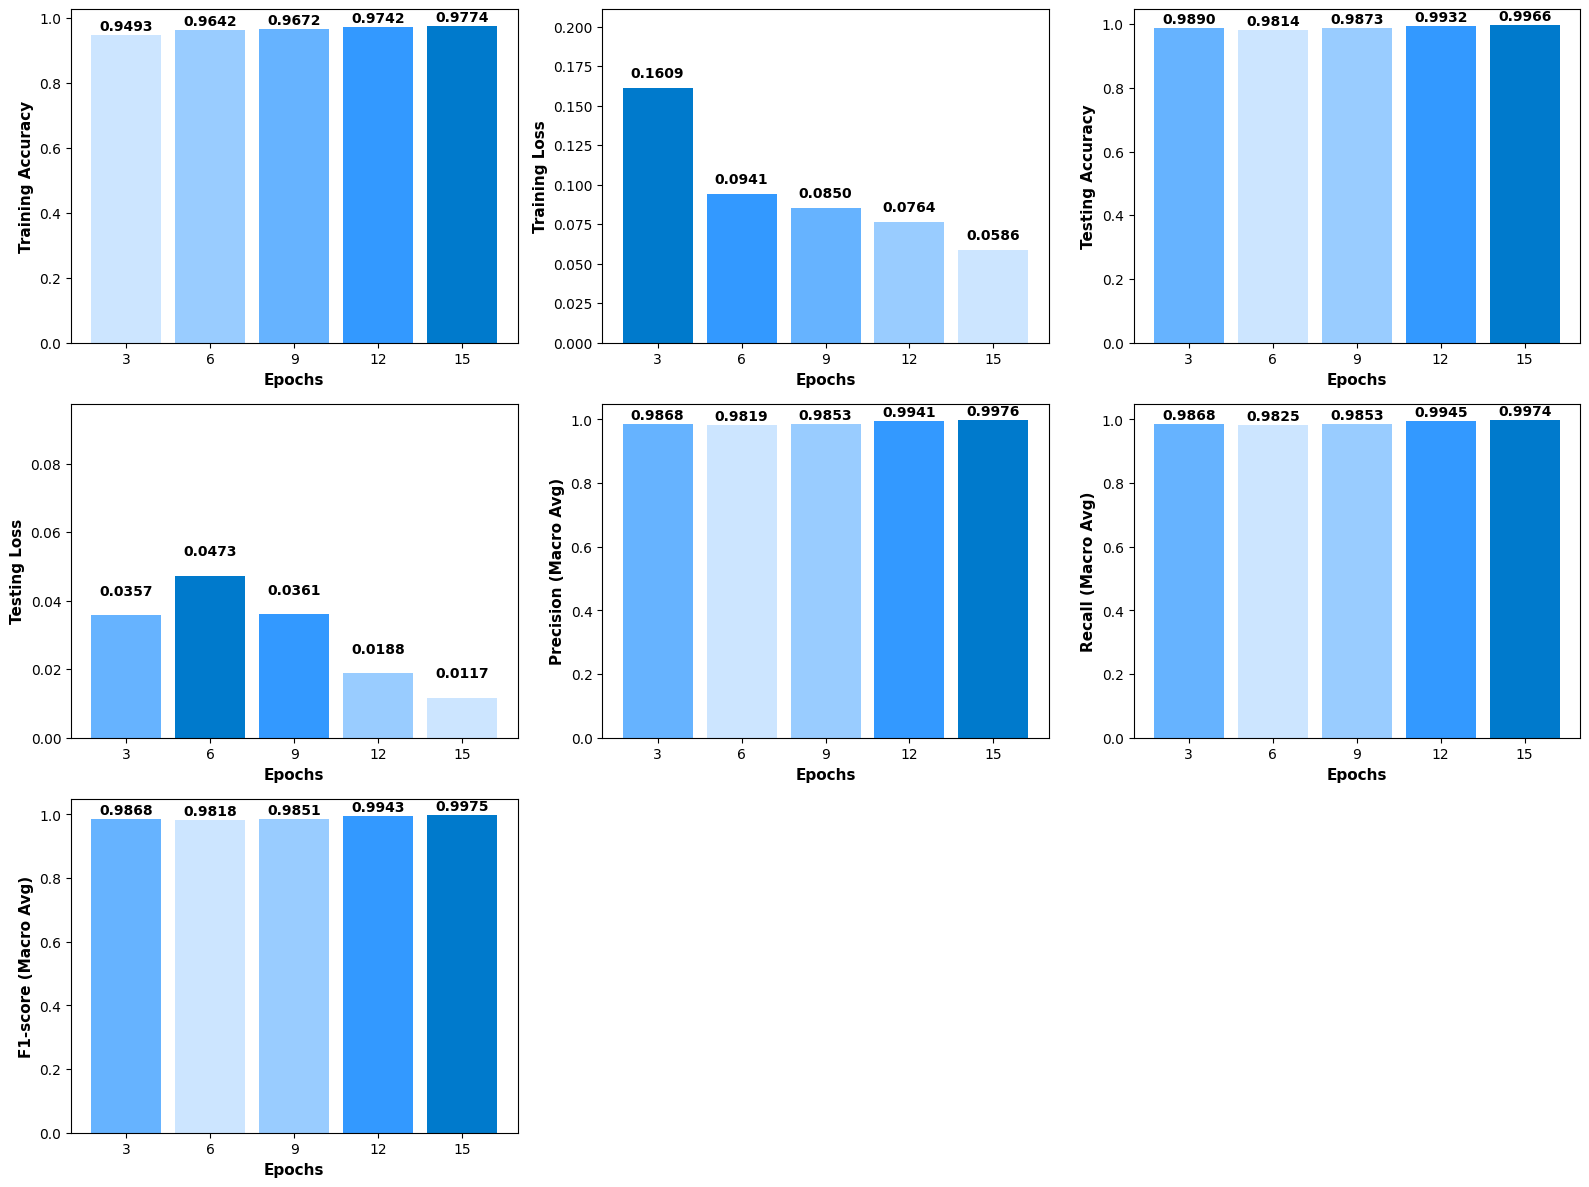

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Veriler
epochs = [3, 6, 9, 12, 15]
train_accuracy = [0.9493, 0.9642, 0.9672, 0.9742, 0.9774]
train_loss = [0.1609, 0.0941, 0.0850, 0.0764, 0.0586]
test_accuracy = [0.9890, 0.9814, 0.9873, 0.9932, 0.9966]
test_loss = [0.0357, 0.0473, 0.0361, 0.0188, 0.0117]
precision_macro = [0.9868, 0.9819, 0.9853, 0.9941, 0.9976]
recall_macro = [0.9868, 0.9825, 0.9853, 0.9945, 0.9974]
f1_macro = [0.9868, 0.9818, 0.9851, 0.9943, 0.9975]

# Renkler (açık maviden koyuya)
colors = ['#cce5ff', '#99ccff', '#66b3ff', '#3399ff', '#007acc']

# Metrikleri ve isimlerini bir araya getirelim
metrics = [
    ("Training Accuracy", train_accuracy),
    ("Training Loss", train_loss),
    ("Testing Accuracy", test_accuracy),
    ("Testing Loss", test_loss),
    ("Precision (Macro Avg)", precision_macro),
    ("Recall (Macro Avg)", recall_macro),
    ("F1-score (Macro Avg)", f1_macro),
]

# Grafik oluştur
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axs = axs.flatten()

for i, (title, values) in enumerate(metrics):
    # Sort values and epochs together
    sorted_indices = np.argsort(values)
    sorted_values = np.array(values)[sorted_indices]
    sorted_epochs = np.array(epochs)[sorted_indices]

    # Assign colors based on sorted order
    sorted_colors = [colors[j] for j in np.argsort(sorted_values)]


    bars = axs[i].bar(sorted_epochs, sorted_values, color=sorted_colors, width=2.5)
    #axs[i].set_title(title, fontsize=13, fontweight='bold') # Remove title
    axs[i].set_xlabel("Epochs", fontsize=11, fontweight='bold')
    axs[i].set_ylabel(title, fontsize=11, fontweight='bold') # Set metric name as y-label
    axs[i].set_ylim(0, max(values) + 0.05)
    axs[i].set_xticks(epochs) # Set x-axis ticks to the original epoch values

    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Boş kalan subplot'u kaldır
for j in range(len(metrics), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()